In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from modules import IGR, Visualization, Operation, Distribution

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Load points from file
filename = mp + '/dataset/3d/sphere.xyz'
dataset, normal_vectors = Operation.read_txt3(filename, device=device)

In [5]:
traineddata_path = mp + '/models/sphere_uniform_gaussian.traineddata'
model = IGR.load_model(traineddata_path, dimension=3, device=device)

No model found


Step 500:
tensor(0.0588, device='cuda:0', grad_fn=<AddBackward0>)
Step 1000:
tensor(0.0223, device='cuda:0', grad_fn=<AddBackward0>)
Step 1500:
tensor(0.0164, device='cuda:0', grad_fn=<AddBackward0>)
Step 2000:
tensor(0.0158, device='cuda:0', grad_fn=<AddBackward0>)
Step 2500:
tensor(0.0114, device='cuda:0', grad_fn=<AddBackward0>)
Step 3000:
tensor(0.0114, device='cuda:0', grad_fn=<AddBackward0>)
Step 3500:
tensor(0.0106, device='cuda:0', grad_fn=<AddBackward0>)
Step 4000:
tensor(0.0118, device='cuda:0', grad_fn=<AddBackward0>)
Step 4500:
tensor(0.0155, device='cuda:0', grad_fn=<AddBackward0>)
Step 5000:
tensor(0.0212, device='cuda:0', grad_fn=<AddBackward0>)


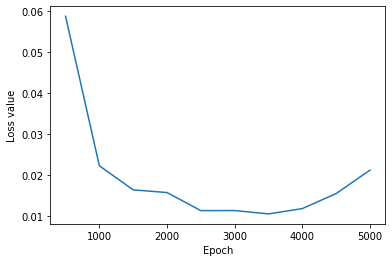

In [6]:
# Define loss function and neural network
loss_function = IGR.LossFunction(1, 0.01, Distribution.uniform_gaussian)
# loss_function = IGR.LossFunction()
model = IGR.train(dataset, normal_vectors, 5000, 200, device, loss_function, model=model)

In [7]:
IGR.save_model(traineddata_path, model)

In [8]:
xx, yy, zz = Visualization.grid_from_torch(dataset[:,0], dataset[:,1], dataset[:,2], resx=50, resy=50, resz=50, device=device)

In [9]:
output_path = None
z = Visualization.nn_sampling(model, xx, yy, zz=zz, g_norm_output_path = output_path, device=device)

tensor([[[0.1379, 0.1340, 0.1302,  ..., 0.1255, 0.1290, 0.1328],
         [0.1340, 0.1301, 0.1263,  ..., 0.1216, 0.1252, 0.1289],
         [0.1303, 0.1263, 0.1225,  ..., 0.1178, 0.1215, 0.1252],
         ...,
         [0.1261, 0.1222, 0.1184,  ..., 0.1145, 0.1181, 0.1219],
         [0.1297, 0.1258, 0.1220,  ..., 0.1181, 0.1217, 0.1255],
         [0.1334, 0.1295, 0.1258,  ..., 0.1219, 0.1255, 0.1292]],

        [[0.1340, 0.1300, 0.1263,  ..., 0.1216, 0.1252, 0.1289],
         [0.1301, 0.1261, 0.1223,  ..., 0.1177, 0.1213, 0.1251],
         [0.1263, 0.1223, 0.1185,  ..., 0.1139, 0.1175, 0.1213],
         ...,
         [0.1222, 0.1182, 0.1144,  ..., 0.1105, 0.1141, 0.1179],
         [0.1258, 0.1219, 0.1181,  ..., 0.1141, 0.1178, 0.1215],
         [0.1295, 0.1256, 0.1218,  ..., 0.1179, 0.1215, 0.1253]],

        [[0.1302, 0.1263, 0.1225,  ..., 0.1178, 0.1214, 0.1252],
         [0.1263, 0.1223, 0.1185,  ..., 0.1139, 0.1175, 0.1213],
         [0.1225, 0.1185, 0.1147,  ..., 0.1101, 0.1137, 0.

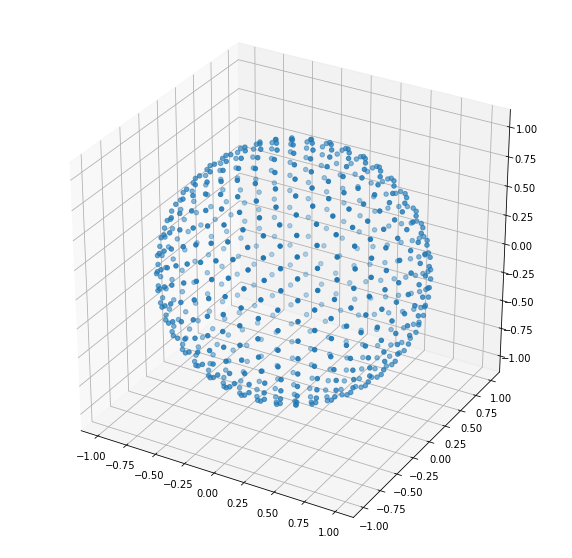

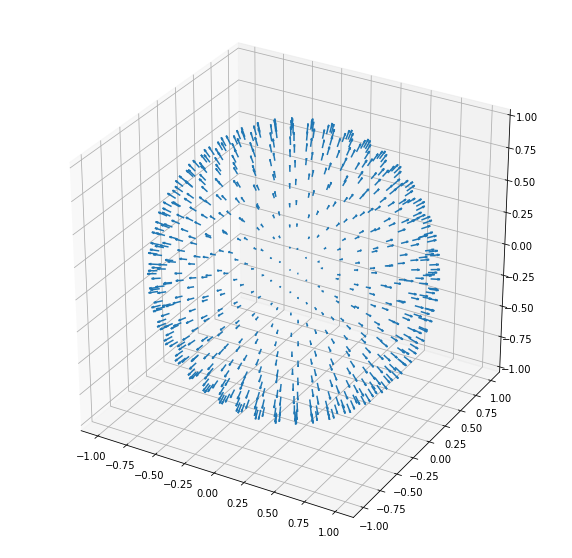

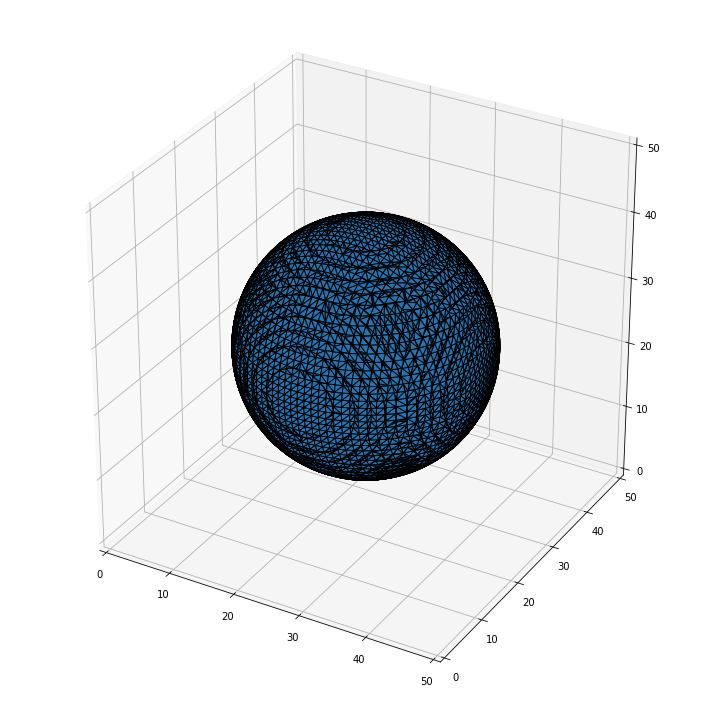

In [10]:
Visualization.visualize3(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), z.detach().cpu().numpy())

In [11]:
# # x = torch.tensor(([1.0,2.0,3.0], [2.0,3.0,4.0]))
# # y = torch.tensor(([1.0, 2.0], [2.0, 3.0]))
# # # print(x.shape)
# # # # print(dataset)
# # print(x.norm(2, dim=1))
# # print(y.norm(2, dim=1))
# # print(dataset)
# # print(dataset[0].shape[0])
# in_tensor = torch.tensor(([[1.0,2.0,3.0], [2.0,3.0,4.0],[3.0,4.0,5.0]]))
# # in_tensor = torch.tensor(([[1.0,2.0], [2.0,3.0], [3.0,4.0]]))
# size0 = in_tensor.size()[0]
# size1 = in_tensor.size()[1]
# print(size0)
# x = in_tensor.unsqueeze(0).expand(size0,size0,size1)
# y = x.transpose(0,1)
# print(x-y)
# print(torch.norm(x-y, dim=-1))